# Ch18. 파이선과 인터넷

**파이썬 네트워크나 인터넷을 위한 수많은 모듈을 지원 **

- 구글은 주로 C++을 쓰기 때문에, C++ 코드를 SWIG으로 감싸서 쓰는 경우가 많고 점차 증가 
- 다른 언어간의 통신을 위해 자체적인 바이너리 기반 RPC 프로토콜 존재
- 구글 내부의 모든 파이썬 코드는 반드시 PEP-8을 따라야 하는데 들여쓰기는 2칸으로 하는 것이 차이
- 구글의 빌드 시스템은 완전히 파이썬으로 돼 있고, 의존성 관리, 주기적 빌드 등 모든 것을 관리
- RPM같은 내부 패키징 시스템은 파이썬
- 서버 관리와 서버간 정적 데이터 전송 등에 파이썬을 쓴다. 물론 모니터링, 리포팅, 로그/분석 등도 파이썬
- code.google.com과 Google Groups 등 일부는 프론트엔드 서비스까지도 파이썬으로 되어 있는 것도 있음
- 구글에서는 파이썬을 어울리는 적소에 사용하고 있기 때문에, 파이썬의 속도가 문제되는 경우는 거의 없다. 퍼포먼스가 필요한 경우에는 C/C++라이브러리를 SWIG으로 긁어서 사용

SWIG : a software development tool that connects programs written in C and C++ with a variety of high-level programming languages <http://www.swig.org/>

RPC는 Remote procedure call의 약자로, 말 그대로 원격 프로시저 호출.외부 사용자가 서버 내의 프로시저를 호출
<http://timewizhan.tistory.com/entry/RPC-%ED%94%84%EB%A1%9C%ED%86%A0%EC%BD%9C>

PEP-8 : 파이썬 코딩 규칙 <http://kenial.tistory.com/902>

파이썬 의존성<https://www.slideshare.net/hnki0104/ss-42101768> 관리 <https://hajunsoo.org/posts/2016-11-24/>

## 01 파이썬이 지원하는 네트워크 인터넷 모듈

 1. soket
 2. email
 3. json
 4. mailbox
 5. webbrowser
 6. urllib

### 01 Soket

- 로우 레벨 네트워킹 인터페이스로 윈도우, 리눅스를 포함한 대부분의 플랫폼에서 사용 가능하다. 
- 소프트웨어로 작성된 통신 접속점이라고 할 수 있는데 네트워크 응용 프로그램은 소켓을 통하여 통신망으로 데이터를 송수신하게 된다.
- 소켓은 응용 프로그램에서 TCP/IP를 이용하는 창구 역할을 하며 응용 프로그램과 소켓 사이의 인터페이스를 소켓 인터페이스라고 한다.
- 한 컴퓨터내에는 보통 한 세트의 TCP/IP가 수행되고 있으며, 네트웍 드라이버는 LAN 카드와 같은 네트웍 접속 장치(NIU: Network Interface Unit)를 구동하는 소프트웨어를 말한다

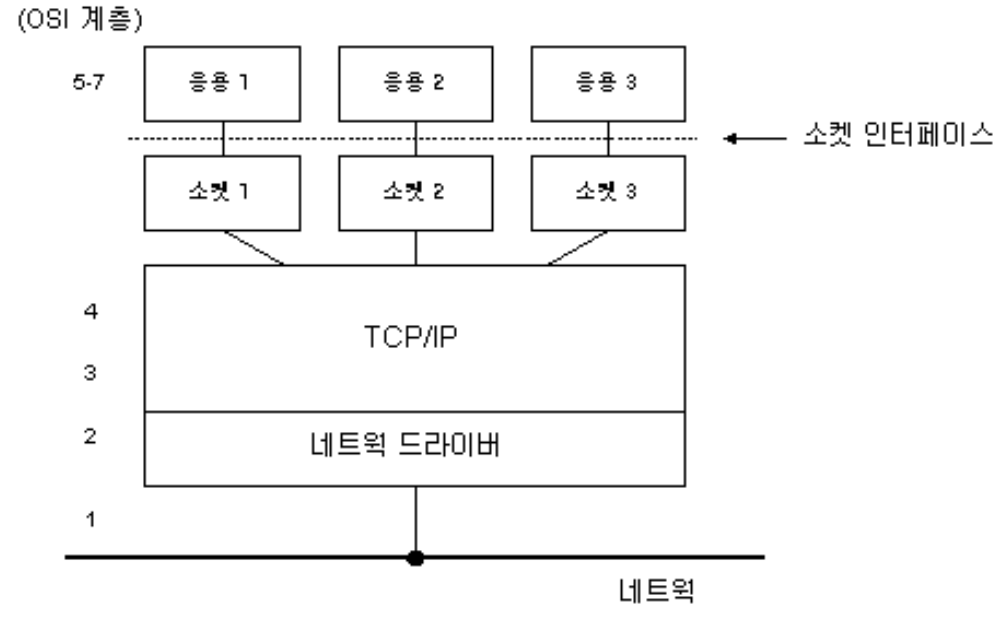

In [ ]:
# 소켓으로 만든 간단한 서버와 클라이언트 예제

import socket

HOST = ''      # Host를 지정하지 않으면 가능한 모든 인터페이스를 의미
PORT = 50007   # 포트 지정
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)   # 소켓 생성
s.bind((HOST, PORT))
s.listen(1)    # 접속이 있을 때까지 기다린다.
conn, addr = s.accept()  # 접속을 승인
conn = s.accept()
print("Connected by", addr)
while True:
    data = conn.recv(1024)
    if not data: break
    conn.send(data) # 받은 데이터를 그대로 클라이언트에 전송
conn.close()

In [ ]:
import socket

HOST = "127.0.0.1"  # localhost
PORT = 50007        # 서버와 같은 포트 사용
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.connect((HOST,PORT))
s.send(b'Hello, python')    # 문자를 전송
data = s.recv(1024)
s.close()
print("Received", repr(data))

### 03 json 

- 가벼운 데이터 교환을 위한 자바스크립트 문법, json은 데이타를 교환하는 한 포맷
- json 라이브러리를 사용하면, Python 타입의 Object를 json 문자열로 변경할 수 있으며(json 인코딩), 또한 json 문자열을 다시 Python 타입으로 변환할 수 있다 (json 디코딩)
- 파이썬 데이터를 json 형긱으로 바꿔주는 dump 기능 
- json을 파이선 객체로 변환하는 decode 기능 
- 가장 많이 사용되는 JSON 포맷은 Key-Value Pair의 컬렉션

http://pythonstudy.xyz/python/article/205-JSON-%EB%8D%B0%EC%9D%B4%ED%83%80

In [13]:
import json

json.dumps([1,2,3,{'4':5,'6':7}],separators=(',',':'))

'[1,2,3,{"4":5,"6":7}]'

In [20]:
import json
 
# 테스트용 Python Dictionary
student = {
    'id': 20122682,
    'name': 'sungho',
    'history': [
        {'date': '2012-07-23', 'item': 'Pyhone'},
        {'date': '2017-10-28', 'item': 'Study'},
    ]
}
 
# JSON 인코딩
jsonString = json.dumps(student)
 
# 문자열 출력
print(jsonString)
print(type(jsonString)) 

{"id": 20122682, "name": "sungho", "history": [{"date": "2012-07-23", "item": "Pyhone"}, {"date": "2017-10-28", "item": "Study"}]}
<class 'str'>


위의 코드를 실행하면 JSON 문자열이 한 줄로 길게 표현됨을 알 수 있다. 이렇게 축약된 JSON 문자열은 다른 컴퓨터나 네트워크 상에 보낼 때 유용하지만, 화면에 표시할 필요가 있을 경우는 읽기가 불편하다.

In [21]:
jsonString = json.dumps(student, indent=4)
print(jsonString)

{
    "id": 20122682,
    "name": "sungho",
    "history": [
        {
            "date": "2012-07-23",
            "item": "Pyhone"
        },
        {
            "date": "2017-10-28",
            "item": "Study"
        }
    ]
}


In [30]:
import json
 
# JSON 디코딩
dict = json.loads(jsonString)

# Dictionary 데이타 체크
print(dict['name'])
for h in dict['history']:
    print(h['date'], h['item'])

sungho
2012-07-23 Pyhone
2017-10-28 Study


### 04 mailbox 

- 말그대로 메일 박스를 관리하는 데 사용하는 모듈

In [131]:
import mailbox
import os

for message in mailbox.mbox('~/mbox'):     # mbox : email stroage format organizing email massages 
    subject = message['subject']
    print(subject)

#~/mbox 저장소에 저장된 메일을 읽어와 그 중 메일 제목을 출력

#os.path.abspath("~/mbox")

### 05 webbrowser 

- 웹 브라우저를 간단하게 제어할 때 사용

In [132]:
url = "https://www.naver.com/"
import webbrowser
webbrowser.open_new(url)

#프롬프트 창에서 실행

False

### 06 urllib

- url 파싱에서부터 url에 할당된 데이터를 가져오는 수집기 등 여러 가지 기능 제공
- 웹상에서 문서나 파일을 가져올 수 있고, url, header 등 여러 웹 정보를 가져올 수 있다.

In [136]:
# url 파싱하는 예제
from urllib.parse import urlparse

url = "http://music.naver.com/listen/top100.nhn?domain=TOTAL"
parts = urlparse(url)
print(parts)


ParseResult(scheme='http', netloc='music.naver.com', path='/listen/top100.nhn', params='', query='domain=TOTAL', fragment='')


In [137]:
parts.path

'/listen/top100.nhn'

In [135]:
# 예제 2

import urllib.request

f = urllib.request.urlopen("http://music.naver.com/listen/top100.nhn?domain=TOTAL")
print(f.headers)         # 해더 출력
print(f.code)            # 웹 페이지의 상태 200(정상)
print(f.read())          # 웹 페이지의 실제 HTML 소스 

Date: Sat, 28 Oct 2017 09:04:30 GMT
Server: Apache
Cache-Control: no-cache
Expires: Thu, 01 Jan 1970 00:00:00 GMT
Set-Cookie: JSESSIONID=63F3978D927BE95C85ABB434B87BE911; Path=/; HttpOnly
X-Frame-Options: SAMEORIGIN
Vary: Accept-Encoding
Connection: close
Transfer-Encoding: chunked
Content-Type: text/html;charset=utf-8


200
b'\r\n\r\n\r\n\r\n\r\n\r\n\r\n<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\r\n<html lang="ko">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\r\n<meta http-equiv="Content-Script-Type" content="text/javascript">\r\n<meta http-equiv="Content-Style-Type" content="text/css">\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<link rel="icon" href="/favicon.ico" type="image/x-icon" />\r\n<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />\r\n\r\n\r\n\r\n\r\n\r\n<title>TOP 100 \xec\xa2\x85\xed\x95\xa9 : \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xae\xa4\xe

## 02 OpenAPl를 이용해 책 정보 가져오기 

- 최근 들어 플리커. 구글, 아마존 등의 인터넷 서비스 업체에서는 자사가 제공하는 서비스를 외부에서 사용할 수 있게 API를 공개
- 대부분의 서비스는 HTTP 프로토콜의 GET, POST 같은 메서드를 이용해 자원 혹은 서비스를 요청하고, 서버는 XML 문서나 json 형태로 결괏값을 반환하는 방식(REST)을 주로 사용

#### 클라이언트에서 서버로 데이터를 전송
   - GET :  가져오는 것 
               서버에서 어떤 데이터를 가져와서 보여준다거나 하는 용도이지 서버의 값이나 상태등을 바꾸지 못함
               GET은 주소줄에 값이 ?뒤에 쌍으로 이어붙고, URL에 이어붙기 때문에 길이제한이 있어서 많은양의 데이터는 보내기 어려움
               ex) http://url/bbslist.html?id=5&pagenum=2
   - POST : 수행하는 것 
               서버의 값이나 상태를 바꾸기 위해서 사용(글쓰기를 하면 글의 내용이 DB에 저장이 되고 수정을 하면 DB값이 수정)
               body안에 숨겨 져서 데이터가 보내지며, 많은 양의 데이터를 보내기에 적합
               form을 이용해서 submit을 하는 형태

In [91]:
# 5NiQHeVxQx7d7yZHRm9Z
# erLNCBMIbL

In [142]:
# 네이버 책 제목 중에 love 가 포함된 책을 검색한 결과 중 10개만 가져오라

import os
import sys
import urllib.request
from xml.dom.minidom import parseString

client_id = "5NiQHeVxQx7d7yZHRm9Z"
client_secret = "erLNCBMIbL"
encText = urllib.parse.quote("love")                                     # 'love' 란 단어 검색
url = "https://openapi.naver.com/v1/search/book.xml?query=" + encText    #  책의 제목에 해당
url += "&display=10&start=1"                                             #  10개만 보여줘
resp = None

req = urllib.request.Request(url)
req.add_header("X-Naver-Client-Id",client_id)
req.add_header("X-Naver-Client-Secret",client_secret)                     # 서버에 요청 
try:
    resp = urllib.request.urlopen(req)
except urllib.error.URLError as e:
    print(e.reason)
    print(parseString(e.read().decode('utf-8')).toprettyxml())
except urllib.error.HTTPError as e:
    print("error code=" + e.code)
    print(parseString(e.read().decode('utf-8')).toprettyxml())
else:
    response_body = resp.read()
    print(parseString(response_body.decode('utf-8')).toprettyxml())       # toprettyxnl() : 예쁘게 출력

<?xml version="1.0" ?>
<rss version="2.0">
	<channel>
		<title>Naver Open API - book ::'love'</title>
		<link>http://search.naver.com</link>
		<description>Naver Search Result</description>
		<lastBuildDate>Sat, 28 Oct 2017 18:18:13 +0900</lastBuildDate>
		<total>149660</total>
		<start>1</start>
		<display>10</display>
		<item>
			<title>편안하고 사랑스럽고 그래 &lt;b&gt;LOVE&lt;/b&gt; BOOK</title>
			<link>http://book.naver.com/bookdb/book_detail.php?bid=11991672</link>
			<image>http://bookthumb.phinf.naver.net/cover/119/916/11991672.jpg?type=m1&amp;udate=20170503</image>
			<author>퍼엉</author>
			<price>14000</price>
			<discount>12600</discount>
			<publisher>예담</publisher>
			<pubdate>20170511</pubdate>
			<isbn>8959135100 9788959135103</isbn>
			<description>질문에 대답하는 것만으로 사랑이 자라는 특별한 기프트북&amp;#x0D;연인들이 직접 쓰고, 그리고, 붙이고, 만들어 선물하는 책&amp;#x0D;&amp;#x0D;이 책에는 페이지마다 사랑스럽고 따뜻한 그림과 함께 질문이 실려 있다. 질문에 대답만 적어도 좋고, 빈 공간에 그림을 그리거나 스티커를 붙여 장식을 더해도 좋다. 한 권씩... </description>
		</item>
		<item>
			<title>

책 제목 중에 "love"가 포함된 책을 검색한 결과 중 10개를 가져오라는 명령을 URL 형태로 만들고 ClientID, Client Secret 는 add_header를 이용해 설정한다. urlopen을 하면 http 요청이 서버로 전달되고 결괏값이 리턴 

### http.client 모듈 사용

- http 프로토콜을 사용하는 클라이언트 프로그램을 만들 때 사용
- urllib 보다 쓰기 까다롭지만, 세세한 부분까지 제어 가능

##### class http.client.HTTPConnection (<host>[, <port>[, <strict>[, <timeout>]]])
    서버에 HTTP 요청을 하기 위해서 연결 설정, HTTP 프로토콜을 사용하기 위한 일종의 핸들러 
    host : 서비스를 요청할 host 서버 
    port : host 서버의 port 번호 
    strict :  defaults to a false value
    timeout : 접속이 지연될 때 얼마 도안 접속 요청을 기다릴지 설정 
##### HTTPConnection.request(<method>,<url>[, <body>[, <headers>]])
     연결 성공 시 URL 호출, 서버로 틀정한 HTTP를 요청할 때 사용
    method : HTTP 메소드를 의미, GET,POST,PUT,DELETE 가 있다.
    url    : 요청하는 url
    body, header : body, header 를 특정하게 요청
##### HTTPConnection.getresponse()
     openAPI 서버에서 보내온 요청을 받는다. 반환값은 HTTPResponse 인스턴스 객체
     성공 시 status 값이 200으로 반환 
##### HTTPResponse.read()
     서버에서 받아온 정보 중 본문(contents) 데이터를 읽는다.
##### HTTPResponse.getheader() ,  HTTPResponse.getheader()
    getheaders() : 모든 해더 정보
    getheader(name[, defult]) : 특정한 정보


In [143]:
import os
import sys
import http.client
from xml.dom.minidom import parseString

client_id = "5NiQHeVxQx7d7yZHRm9Z"
client_secret = "erLNCBMIbL"

#openAPI가 https 프로토콜을 사용하기 때문에 HTTPSConnection 을 사용함.
conn = http.client.HTTPSConnection("openapi.naver.com")
#conn.set_debuglevel(1) #debug mode 설정
headers = {"X-Naver-Client-Id": client_id, "X-Naver-Client-Secret": client_secret}
encText = "love"
params = "?query=" + encText + "&display=10&start=1"

conn.request("GET", "/v1/search/book.xml" + params, None, headers)
res = conn.getresponse()

if int(res.status) == 200 :
    print(parseString(res.read().decode('utf-8')).toprettyxml())
else:
    print ("HTTP Request is failed :" + res.reason)
    print (res.read().decode('utf-8'))

conn.close()

<?xml version="1.0" ?>
<rss version="2.0">
	<channel>
		<title>Naver Open API - book ::'love'</title>
		<link>http://search.naver.com</link>
		<description>Naver Search Result</description>
		<lastBuildDate>Sat, 28 Oct 2017 18:25:17 +0900</lastBuildDate>
		<total>149660</total>
		<start>1</start>
		<display>10</display>
		<item>
			<title>편안하고 사랑스럽고 그래 &lt;b&gt;LOVE&lt;/b&gt; BOOK</title>
			<link>http://book.naver.com/bookdb/book_detail.php?bid=11991672</link>
			<image>http://bookthumb.phinf.naver.net/cover/119/916/11991672.jpg?type=m1&amp;udate=20170503</image>
			<author>퍼엉</author>
			<price>14000</price>
			<discount>12600</discount>
			<publisher>예담</publisher>
			<pubdate>20170511</pubdate>
			<isbn>8959135100 9788959135103</isbn>
			<description>질문에 대답하는 것만으로 사랑이 자라는 특별한 기프트북&amp;#x0D;연인들이 직접 쓰고, 그리고, 붙이고, 만들어 선물하는 책&amp;#x0D;&amp;#x0D;이 책에는 페이지마다 사랑스럽고 따뜻한 그림과 함께 질문이 실려 있다. 질문에 대답만 적어도 좋고, 빈 공간에 그림을 그리거나 스티커를 붙여 장식을 더해도 좋다. 한 권씩... </description>
		</item>
		<item>
			<title>

### 책 관리 프로그램 기능 구현 

- 사용자가 ISBN 코드를 입력하면 해당 책 정보를 가져와 책 제목만 XML에 저장하는 기능 

    1.가지고 오는 XML 문서가 어떤 구조를 가지고 있는 지 알아야 한다.
        보통 스키마와 DTD 문법을 사용(Well Formed XML)하는데, 네이버의 OpenAPI는 출력 결과 필드를 사용
    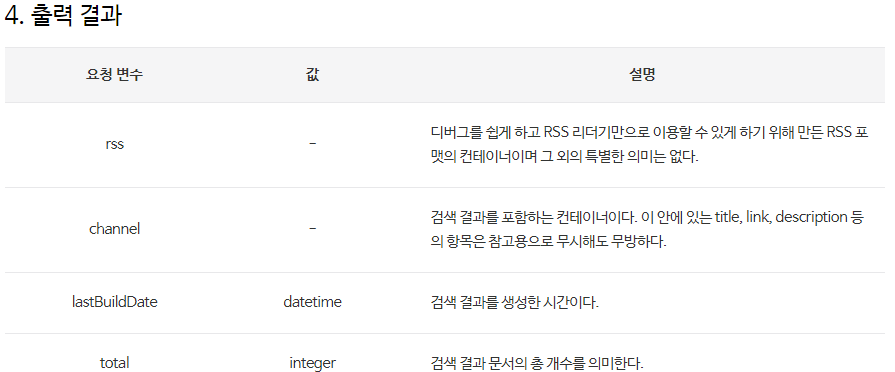 
    https://developers.naver.com/docs/search/book/ (네이버 튜토리얼 페이지)


        스키마 : 서로 다른 시스템 사이의 데이터를 주고 받아 사용할 수 있게 데이터 표준화를 위해 제공 
        DTD : 하나의 시스템 내에서 사용할 XML 데이터 구조를 정의하여 유효성 점검할 때 사용
            => XML 문서의 구조를 표현하기 위해 사용
http://ehpub.co.kr/tag/dtd%EC%99%80-%EC%8A%A4%ED%82%A4%EB%A7%88-%EB%B9%84%EA%B5%90/

- 2.필요한 정보 파악 
        여기서 필요한 정보는 책 제목인데 XML 문서에서는 <title>로 시작되는 부분이다. 

In [115]:
def getBookDataFromISBN(isbn):
    global server, conn, client_ID, client_secret
    if conn == None :
        connectOpenAPIServer()
        """
        def connectOpenAPIServer():
        global conn, server
        conn = HTTPConnection(server)
        """
    uri = userURIBuilder("/v1/search/book_adv.xml", display="1", start="1", d_isbn=isbn)           # 필요한 정보를 가져올 URL 생성 
    conn.request("GET", uri, None, {"X-Naver-Client-Id": client_id, "X-Naver-Client-Secret": client_secret})
    
    req = conn.getresponse()
    print (req.status)
    if int(req.status) == 200 :                                                 # 요청이 성공 시 
        print("Book data downloading complete!")
        return extractBookData(req.read())                                      # 요청이 성공하면, book 정보를 추출 
    else:
        print ("OpenAPI request has been failed!! please retry")
        return None

서버에 필요한 정보를 URL로 dycjdgkrh XML 문서로 응답을 받는 구조로 되어 있다. 서버 접근이 실패시, 다시 시도하는 부분을 넣거나 입력한 URL이 맞는지 사용자에게 묻는 예외 처리를 할 수 있다.

- 3.OpenAPI를 통해 가져온 XML 문서에서 title 추출 
        도서 관리 프로그램의 DOM에 추가 

In [127]:
def extractBookData(strXml):
    from xml.etree import ElementTree
    tree = ElementTree.fromstring(strXml)
    print(strXml)
    # Book 엘리먼트를 가져옵니다.
    itemElements = tree.getiterator("item")  # return list type
    print(itemElements)
    for item in itemElements:
        isbn = item.find("isbn")
        strTitle = item.find("title")
        print(strTitle)
        if len(strTitle.text) > 0:
            return {"ISBN": isbn.text, "title": strTitle.text}
